# Students Social Media Addiction Analysis
#### Problem Statement:
- The problem is the rising trend of social media usage among students, which creates a "digital addiction" that directly affects their academic performance, mental health, and physical well-being.

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Checking the available plot styles
print(plt.style.available)
plt.style.use("seaborn-v0_8-paper")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
# Loading the data
df = pd.read_csv("Students Social Media Addiction.csv")
# Checking first few rows
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
# Checking last few rows
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [5]:
# Getting the amount of rows and columns from data
df.shape

(705, 13)

In [6]:
# To check important information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# Checking for Nan values
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [9]:
# Reading Column Names
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [10]:
# Changing the names of some columns
df = df.rename(columns={'Avg_Daily_Usage_Hours':'Screen Time','Affects_Academic_Performance':'Academic Loss',
                                  'Sleep_Hours_Per_Night':'Sleep Time'})
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Screen Time', 'Most_Used_Platform', 'Academic Loss', 'Sleep Time',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [11]:
# Deleting unnecessary columns
df.drop(['Student_ID','Relationship_Status','Conflicts_Over_Social_Media'], axis = 1, inplace = True)
df

,Age,Gender,Academic_Level,Country,Screen Time,Most_Used_Platform,Academic Loss,Sleep Time,Mental_Health_Score,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,7
...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,5
701,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,9
702,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,7
703,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,4


In [12]:
# To get the statistical summary of the numeric data
df.describe()

,Age,Screen Time,Sleep Time,Mental_Health_Score,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,6.436879
std,1.399217,1.257395,1.126848,1.105055,1.587165
min,18.000000,1.500000,3.800000,4.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,9.000000


## Average Time Spent on Social Media based on Gender

In [13]:
# Group data by gender and calculate average screen time
df.groupby("Gender")["Screen Time"].mean()

Gender
Female    5.011048
Male      4.826136
Name: Screen Time, dtype: float64

- Females have slightly higher average screen time than males, but the difference is very small.

## Top 5 Most Used Social Media Platforms

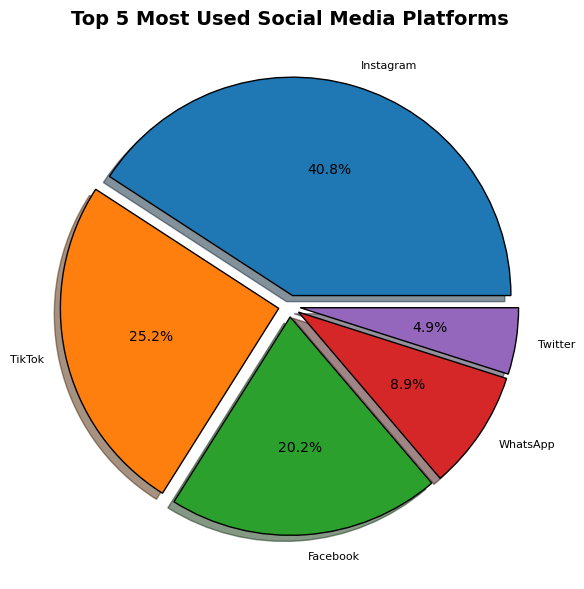

In [14]:
# Create bigger figure
plt.figure(figsize=(6,6))

# Get Top 5 Most Used Social Media Platforms from Dataset
top5_platforms = df["Most_Used_Platform"].value_counts().head(5)

# Create explode effect to slightly separate each slice
explode = [0.05] * len(top5_platforms)

# Plot Pie chart
top5_platforms.plot(
    kind="pie",                 
    autopct="%1.1f%%",          # Show Percentage Values
    shadow=True,                # Add Shadow Effect
    explode=explode,            # Apply Slice Separation
    wedgeprops={"edgecolor": "black", "linewidth": 1}  # Add Borders
)

# Add bold title to the chart
plt.title("Top 5 Most Used Social Media Platforms", fontsize=14, weight="bold")

# Remove y-axis label for clean look
plt.ylabel("")

# Adjust layout for centering
plt.tight_layout()

# Display the final chart
plt.show()

- Instagram is the most used social media platform by a large margin, followed by TikTok and Facebook, while WhatsApp and Twitter have comparatively low usage.

## How Social Media Usage Influences Addiction Levels

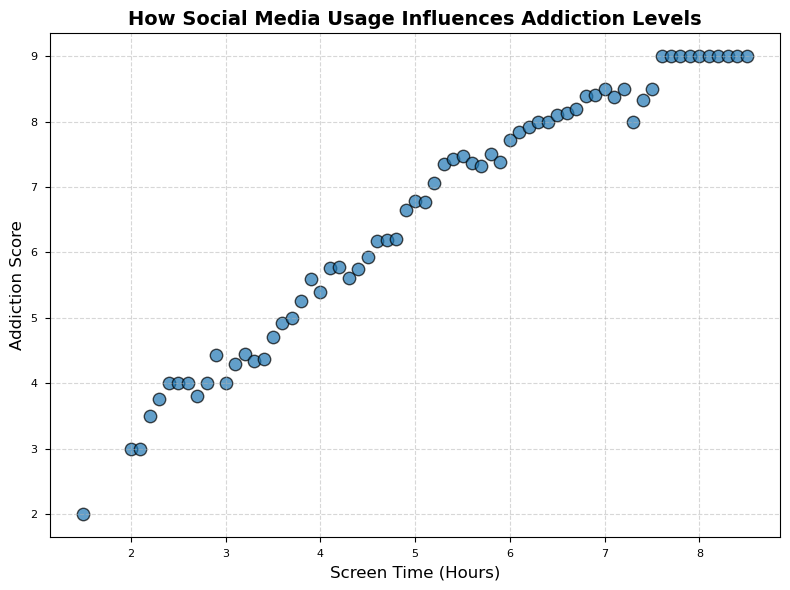

In [15]:
# Group data by screen time and calculate average addiction score
avg_hours = df.groupby("Screen Time")["Addicted_Score"].mean()

# Create bigger figure
plt.figure(figsize=(8,6))

# Plot scatter chart 
plt.scatter(
    avg_hours.index,
    avg_hours.values,
    s=80,           # Marker size
    alpha=0.7,      # Transparency
    edgecolors="black",
    linewidth=1
)

# Add title and labels
plt.title("How Social Media Usage Influences Addiction Levels", fontsize=14, weight="bold")
plt.xlabel("Screen Time (Hours)", fontsize=12)
plt.ylabel("Addiction Score", fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Adjust layout for centering
plt.tight_layout()

# Show plot
plt.show()

- As social media usage increases, addiction scores also increase, showing a strong positive relationship between usage time and addiction level.

## Top 10 Countries with Highest Social Media Usage

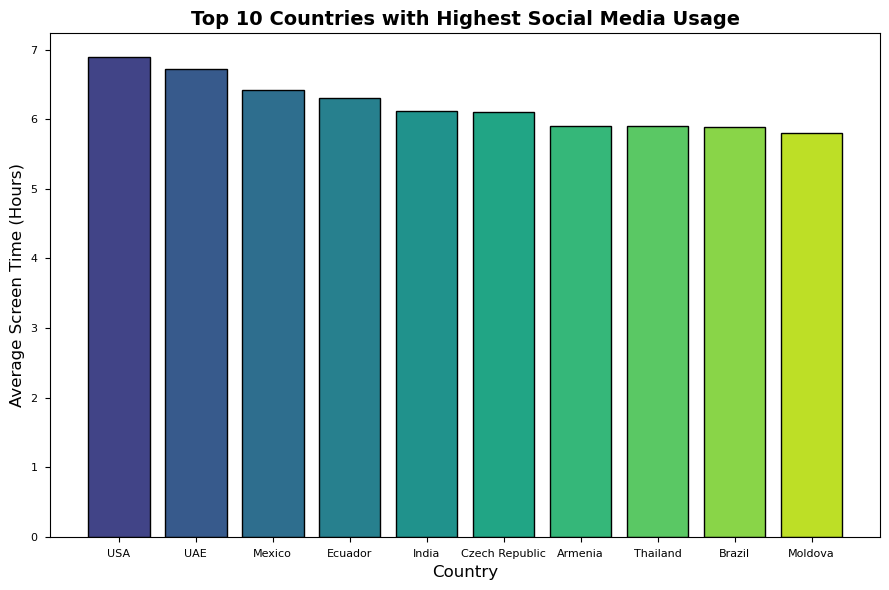

In [16]:
# Group data by country and calculate average screen time
country_avg = df.groupby("Country")["Screen Time"].mean().sort_values(ascending=False).head(10)

# Create bigger figure
plt.figure(figsize=(9,6))

# Create gradient colors using colormap
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(country_avg)))

# Plot bar chart 
plt.bar(
    country_avg.index,
    country_avg.values,
    color=colors,
    edgecolor="black",
    linewidth=1
)

# Add title and labels
plt.title("Top 10 Countries with Highest Social Media Usage", fontsize=14, weight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Screen Time (Hours)", fontsize=12)

# Adjust layout for centering
plt.tight_layout()

# Show plot
plt.show()

- The USA has the highest average social media usage, followed by the UAE and Mexico, while the remaining countries show slightly lower but relatively similar usage levels.

## Average Sleep Hours based on Student's Academic Level

In [17]:
# Group data by academic level and calculate average sleep time
Academic = df.groupby("Academic_Level")["Sleep Time"].mean().round(2)
Academic

Academic_Level
Graduate         7.03
High School      5.46
Undergraduate    6.83
Name: Sleep Time, dtype: float64

- Graduates have the highest average sleep time, followed by undergraduates, while high school students sleep the least.

## Correlation between Addiction Score and Mental Health Score

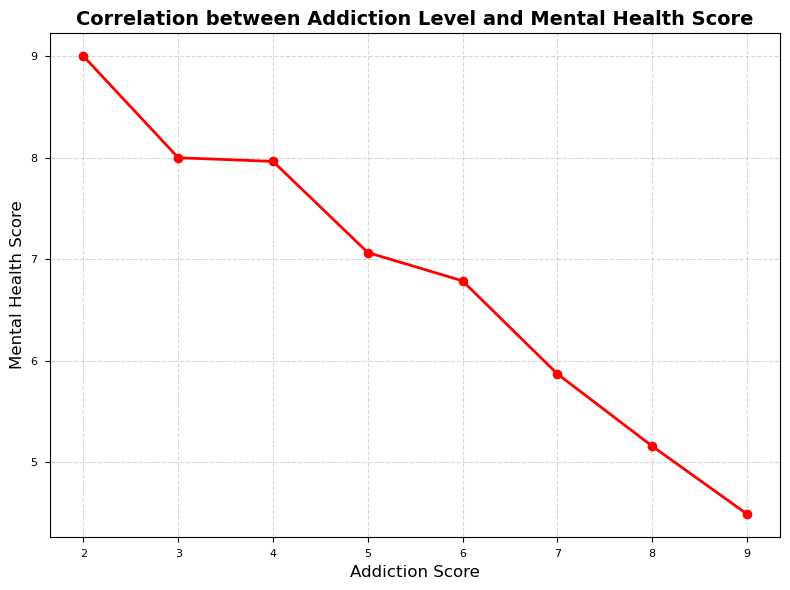

In [18]:
# Group data by addiction score and calculate average mental health score
grouped = df.groupby("Addicted_Score")["Mental_Health_Score"].mean()

# Create bigger figure
plt.figure(figsize=(8,6))

# Plot line chart
plt.plot(
    grouped.index,
    grouped.values,
    color = "red",
    marker='o',
    markersize=7,
    linewidth=2, 
)

# Add title and labels
plt.title("Correlation between Addiction Level and Mental Health Score", fontsize=14, weight="bold")
plt.xlabel("Addiction Score", fontsize=12)
plt.ylabel("Mental Health Score", fontsize=12)

# Add grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

# Adjust layout to keep chart centered
plt.tight_layout()

# Show plot
plt.show()

- Mental Health Score is high when Addiction Score is less, showing a clear negative relationship between addiction and mental well-being.

## How Mental Health Scores Vary with Age

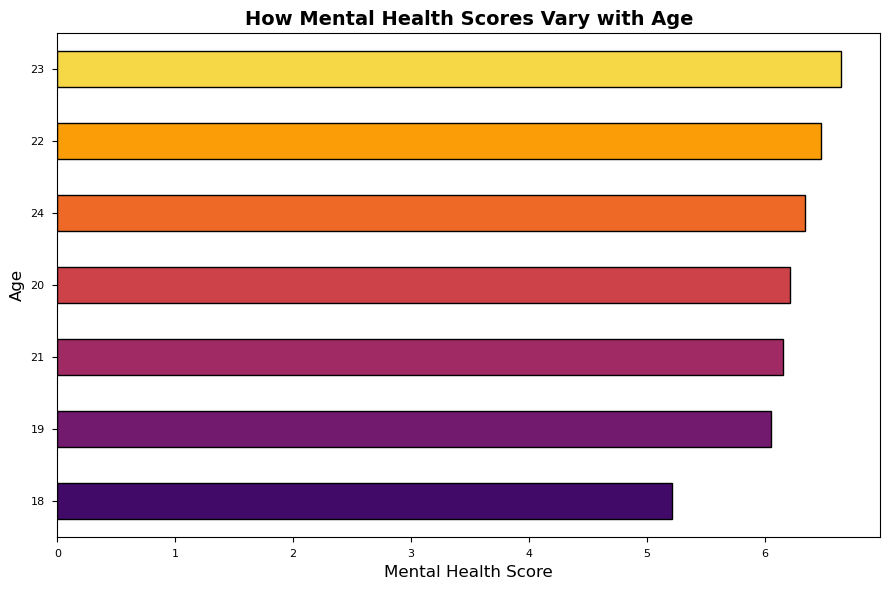

In [19]:
# Group data by age and calculate average mental health score
age_avg = df.groupby("Age")["Mental_Health_Score"].mean().sort_values(ascending = True)

# Create bigger figure
plt.figure(figsize=(9,6))

colors = plt.cm.inferno(np.linspace(0.2, 0.9, len(age_avg)))

# Plot horizontal bar chart
age_avg.plot(
    kind="barh",
    color=colors,
    edgecolor="black",
    linewidth=1
)

# Add title and labels
plt.title("How Mental Health Scores Vary with Age", fontsize=14, weight="bold")
plt.xlabel("Mental Health Score", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Adjust layout for centering
plt.tight_layout()

# Show plot
plt.show()

- The chart shows that mental health scores generally improve from age 18 to the early 20s, peaking around ages 22–23, which suggests that younger participants (around 18) report comparatively lower mental well-being while individuals in their early twenties tend to have better average mental health scores.

## % of Students Reporting Academic Performance Affected by Social Media Usage

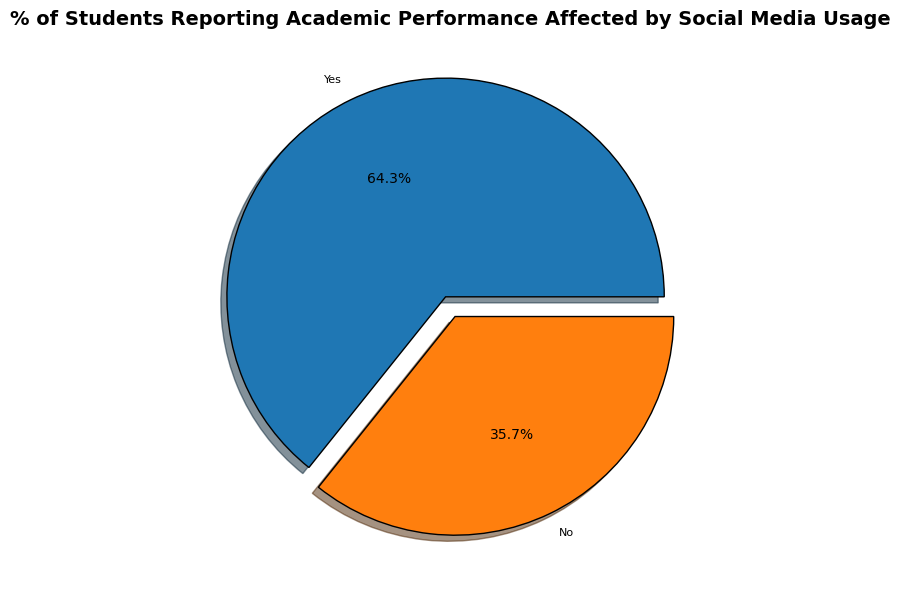

In [20]:
# Count students affected by academic loss
students_affected = df["Academic Loss"].value_counts()

# Create square figure for centering
plt.figure(figsize=(6,6))

# Create explode effect
explode = [0.05] * len(students_affected)

# Plot pie chart with styling
students_affected.plot(
    kind="pie",
    autopct="%1.1f%%",
    shadow=True,
    explode=explode,
    wedgeprops={"edgecolor": "black", "linewidth": 1}
)

# Add bold title
plt.title("% of Students Reporting Academic Performance Affected by Social Media Usage",
          fontsize=14, weight="bold")

# Remove y label for clean look
plt.ylabel("")

# Adjust layout to keep centered
plt.tight_layout()

# Show plot
plt.show()

- The chart shows that 64.3% of students report their academic performance is affected by social media, while 35.7% do not, indicating that a clear majority of students experience a negative academic impact due to social media usage